# Trabalho 3 da disciplina de modulação
Perdas no ferro do indutor

## Importando ondas do PSIM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("lossesHalfBridge.csv")
df['Time'] = df['Time'] * pd.Timedelta(1, 's')
df = df.set_index('Time')

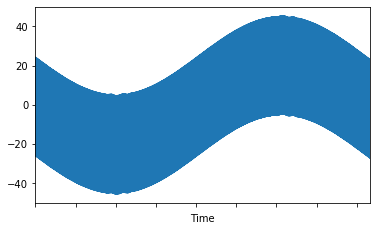

In [4]:
initialTime = df.index[0]
# finalTime = initialTime + 10/60*pd.Timedelta(1, 's')
finalTime = df.index[-1]
df_p = df.loc[initialTime: finalTime, 'VL1']
df_p.plot()

VL1 = df['VL1']

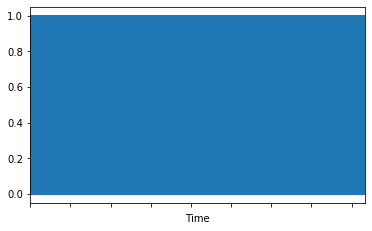

In [5]:
initialTime = df.index[0]
finalTime = initialTime + .05/60*pd.Timedelta(1, 's')
# finalTime = df.index[-1]
df_p = df.loc[initialTime: finalTime, 'Vsa1']

d = df['Vsa1']
d.plot()

In [45]:
L_iyasu = 266e-6  # H
L_half = 50e-6  # H

l_iyasu = 61.24e-3  # m

A_iyasu = 74.19e-6  # m²
N = 50

mu0 = 400*np.pi*1e-9

r = mu0 * N**2 * A_iyasu/(2 * np.pi * L_iyasu)

A_half = L_half * 2 * np.pi * r / (mu0 * N**2); A*1e6

13.945488721804512

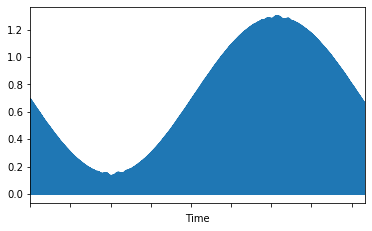

In [46]:
fs = 50*k

deltaB = (VL1 * d)/(N * fs * A_half)

initialTime = deltaB.index[0] + pd.Timedelta(.2/60, 's')
finalTime = initialTime + pd.Timedelta(.01/60, 's')

df_B = deltaB.loc[initialTime: finalTime]

deltaB.plot()

266 uH -> le =  0.06124
50 uH -> le =  0.48992
le, max =  0.0008762208983828075


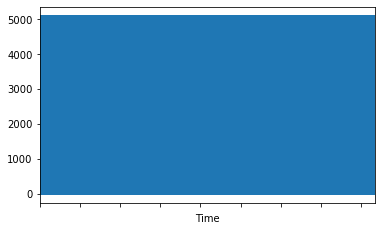

In [70]:
Vi = 50

Res = 1

print('266 uH -> le = ', l_iyasu)
print('50 uH -> le = ', 8*l_iyasu)
print('le, max = ', r*2*np.pi)

H0 = (N*d*Vi)/(Res*(8*l_iyasu))
H0.plot()

## First method by: Calculating losses using the loss map of magnetic material

![](images/A_novel_Fig2.jpg)

In [64]:
# Points obtained from the Fig. 2

dH = {2600: [(-12.289,183.66),(1187.1,109.38),(2804.4,50.625),(4505.3,26.339),(6535.5,16.429)],
      2050: [(-11.954,114.19),(1197.7,58.045),(2825.8,31.055),(4523.2,16.176),(6526.6,11.159)],
      1530: [(-7.1721,56.228),(1197.7,30.969),(2813.9,18.512),(4523.2,11.246),(6543.4,5.9689)],
      1080: [(-2.3907,24.74),(1200.1,16.263),(2818.6,10.64),(4518.4,7.0934),(6531.4,5.7093)]}

dB = {400e-3: [(-16.735,106.14),(1193,109.86),(2811.5,120.76),(4518.4,131.23),(6517.1,138.15)],
      286e-3: [(-4.7814,58.045),(1195.4,58.045),(2809.1,64.446),(4520.8,73.702),(6529,74.135)],
      200e-3: [(0,30.882),(1193,31.142),(2813.9,34.256),(4518.4,38.668),(6529,40.744)],
      133e-3: [(-4.7814,16.09),(1212.1,16.349),(2821,18.685),(4523.2,17.82),(6533.8,17.993)]}

### Creation of Polynomials
From the data obtained in figure above

In [65]:
# From dH data

poly_dH = {}
coord_dH = {}

for key, tuples in dH.items():
    zip_coord = []
    for coord in zip(*tuples):
        zip_coord.append(coord)
    coord_dH[key] = zip_coord
    poly = np.poly1d(np.polyfit(zip_coord[0], zip_coord[1], 2))
    poly_dH[key] = poly

print('dH Polynomials')
poly_dH

dH Polynomials


{2600: poly1d([ 5.43817107e-06, -5.99607627e-02,  1.78789762e+02]),
 2050: poly1d([ 3.56611429e-06, -3.77131081e-02,  1.08035765e+02]),
 1530: poly1d([ 1.45480092e-06, -1.65605008e-02,  5.33696800e+01]),
 1080: poly1d([ 5.53626844e-07, -6.40009032e-03,  2.41508856e+01])}

In [66]:
# From dB data

poly_dB = {}
coord_dB = {}

for key, tuples in dB.items():
    zip_coord = []
    for coord in zip(*tuples):
        zip_coord.append(coord)
    coord_dB[key] = zip_coord
    poly = np.poly1d(np.polyfit(zip_coord[0], zip_coord[1], 2))
    poly_dB[key] = poly

print('dB Polynomials')
poly_dB

dB Polynomials


{0.4: poly1d([-1.25876529e-07,  6.01996673e-03,  1.04958164e+02]),
 0.286: poly1d([-1.13976779e-07,  3.65972043e-03,  5.63092476e+01]),
 0.2: poly1d([2.75888356e-08, 1.49394544e-03, 3.02409355e+01]),
 0.133: poly1d([-1.09532994e-07,  1.02276502e-03,  1.58915708e+01])}

### Showing curves obtained from interpolation

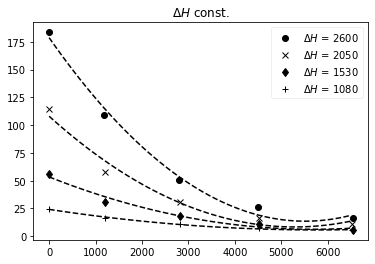

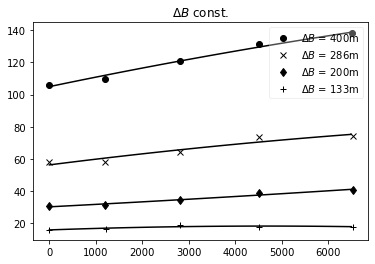

In [67]:
import matplotlib.pyplot as plt

markers = ['o', 'x', 'd', '+']
x = np.linspace(0, 6500)

# fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for key, m in zip(poly_dH, markers):
    poly = poly_dH[key]
    y = poly(x)
    plt.plot(x, y, 'k--')
    plt.plot(coord_dH[key][0], coord_dH[key][1], 'k%s ' % m, label='$\Delta H$ = %d' % key)
plt.title('$\Delta H$ const.')
plt.legend(framealpha=.3, loc='upper right')
# plt.show()
plt.savefig(r'C:\Users\tiarl\Documents\Extra Material\notebooks_modulacao\3 Perdas no ferro do indutor\images\loss_map_DeltaH.pdf')
plt.show()

for key, m in zip(poly_dB, markers):
    poly = poly_dB[key]
    y = poly(x)
    plt.plot(x, y, 'k-')
    plt.plot(coord_dB[key][0], coord_dB[key][1], 'k%s ' % m, label='$\Delta B$ = %dm' % (key*1e3))
plt.title('$\Delta B$ const.')
plt.legend(framealpha=.3, loc='upper right')
# ymin, ymax = ax[1].get_ylim(); print(ymin, ymax)
# ax[1].set_ylim(ymin, ymax+30)
plt.savefig(r'C:\Users\tiarl\Documents\Extra Material\notebooks_modulacao\3 Perdas no ferro do indutor\images\loss_map_DeltaB.pdf')
plt.show()

In [68]:
# Checking the deltaB mapped more closelly to the calculated

keys_poly_dB = np.array(list(poly_dB.keys()))  # This takes all values of dB used in Figure 2 dB constant

# This takes the index of the more approx value to compute the losses
deltaB_more_closely_poly = []
for deltaBi in deltaB:
    deltaB_more_closely_ind = np.argmin(keys_poly_dB - deltaBi)
    deltaB_more_closely = keys_poly_dB[deltaB_more_closely_ind]
    deltaB_more_closely_poly.append(deltaB_more_closely)
set(deltaB_more_closely_poly)

{0.133}

In [69]:
total_power_loss = 0
for each_deltaB_poly, H0i in zip(deltaB_more_closely_poly, H0):
    poly_more_closely = poly_dB[each_deltaB_poly]
    power_loss = poly_more_closely(H0i)
    total_power_loss += power_loss
total_power_loss

2845899.1689413474